# Train and evaluate LR hate speech classifiers
Load data, extract features, train classifiers, evaluate

## With train/dev/test sets

In [1]:
# Load data
import pickle
import pdb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
from scipy.stats import chisquare
from IPython.display import display
from tqdm.notebook import tqdm

scores = {}
# f1_scores = [] # List of dicts with keys: dataset, split, f1 (to create df)
# sigs = []
preds = {}

# Load identity split folds
hate_ratio = 0.3
path = f'/storage2/mamille3/hegemonic_hate/identity_splits_{hate_ratio}hate.pkl'
with open(path, 'rb') as f:
    identity_folds = pickle.load(f)
len(identity_folds) 

20

In [2]:
clfs = {}
scores = []
for name, folds in tqdm(identity_folds.items()):
    print(name)
    
    # Extract features
    print('Extracting features...')
    bow = {}
    # Check for NaNs
    if folds['train']['text'].isnull().values.any():
        pdb.set_trace()
    if folds['test']['text'].isnull().values.any():
        pdb.set_trace()
    vectorizer = TfidfVectorizer(min_df=1)
    vectorizer.fit(folds['train']['text']) # corpus is a list of strings (documents)
    bow = {}
    bow['train'] = vectorizer.transform(folds['train']['text'])
    bow['test'] = vectorizer.transform(folds['test']['text'])
    bow.keys()

    # Train LR model 
    print('Training model...')
    clfs[name] = LogisticRegression(solver='liblinear')
    clfs[name].fit(bow['train'], folds['train']['hate'])

    # Evaluate
    print('Evaluating...')
    score_line = {'train_dataset': name}
    
    for test_name, test_folds in identity_folds.items():
        test_bow = vectorizer.transform(test_folds['test']['text'])
        preds = clfs[name].predict(test_bow)
        score_line[test_name] = f1_score(test_folds['test']['hate'], preds)
        # true = data[split]['test']['hate']
        # scores[dataset][split] = pd.DataFrame(classification_report(true, preds, output_dict=True))
        # f1_scores.append({'dataset': dataset, 'split': split, 'f1_hate': scores[dataset][split].loc['f1-score', 'True']})
        # confusion_matrices[dataset][split] = confusion_matrix(true, preds).ravel()
        
        # print(split)
        # display(scores[dataset][split])
    scores.append(score_line)
        
    print()
        
    # Chi-squared test for significance
    # sig = chisquare(*list(confusion_matrices[dataset].values()))
    # sig = chisquare(confusion_matrices[dataset]['with_heg'], confusion_matrices[dataset]['no_heg'])
    # sigs.append({'dataset': dataset, 'statistic': sig.statistic, 'pvalue': sig.pvalue})

scores = pd.DataFrame(scores).set_index('train_dataset')
scores

  0%|          | 0/20 [00:00<?, ?it/s]

('elsherief2021', 'people of color')
Extracting features...
Training model...
Evaluating...

('elsherief2021', 'white people')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'asian people')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'black people')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'immigrants')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'lgbtq+ people')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'men')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'muslims and arabic/middle eastern people')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'people of color')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'people with disabilities')
Extracting features...
Training model...
Evaluating...

('kennedy2020', 'straight people')
Extracting features...
Training model...
Eval

,"(elsherief2021, people of color)","(elsherief2021, white people)","(kennedy2020, asian people)","(kennedy2020, black people)","(kennedy2020, immigrants)","(kennedy2020, lgbtq+ people)","(kennedy2020, men)","(kennedy2020, muslims and arabic/middle eastern people)","(kennedy2020, people of color)","(kennedy2020, people with disabilities)","(kennedy2020, straight people)","(kennedy2020, white people)","(kennedy2020, women)","(sbic, black people)","(sbic, jews)","(sbic, lgbtq+ people)","(sbic, people of color)","(sbic, people with disabilities)","(sbic, victims of violence)","(sbic, women)"
train_dataset,,,,,,,,,,,,,,,,,,,,
"(elsherief2021, people of color)",0.474701,0.437811,0.161943,0.154696,0.175655,0.019553,0.016129,0.077170,0.160656,0.007859,0.016949,0.127660,0.013937,0.329041,0.043011,0.008511,0.322087,0.009732,0.026726,0.016918
"(elsherief2021, white people)",0.346555,0.464122,0.037559,0.025696,0.010619,0.017316,0.025424,0.010508,0.015326,0.008197,0.009050,0.143885,0.002967,0.034522,0.009524,0.013015,0.039828,0.000000,0.000000,0.003715
"(kennedy2020, asian people)",0.002878,0.000000,0.232365,0.219282,0.259660,0.222508,0.211765,0.238760,0.305691,0.333907,0.190871,0.286689,0.232770,0.013714,0.015601,0.017241,0.017177,0.009709,0.008949,0.007313
"(kennedy2020, black people)",0.020029,0.004808,0.265625,0.516035,0.207519,0.232024,0.298812,0.184799,0.595477,0.310966,0.277154,0.334385,0.330673,0.171129,0.018634,0.041667,0.181640,0.000000,0.008919,0.044205
"(kennedy2020, immigrants)",0.017021,0.004773,0.490066,0.284710,0.592593,0.162821,0.169884,0.419817,0.304821,0.184116,0.132231,0.269231,0.164630,0.026981,0.021505,0.008511,0.029583,0.019185,0.020045,0.015606
"(kennedy2020, lgbtq+ people)",0.002894,0.004819,0.293436,0.269231,0.156006,0.654595,0.606676,0.175492,0.297468,0.552486,0.574018,0.299363,0.578895,0.014857,0.009434,0.274583,0.017251,0.019277,0.013378,0.039711
"(kennedy2020, men)",0.002878,0.009547,0.272727,0.325282,0.159398,0.625734,0.558074,0.201439,0.316100,0.452830,0.558559,0.352941,0.575213,0.034311,0.009217,0.239252,0.040966,0.023202,0.036957,0.079861
"(kennedy2020, muslims and arabic/middle eastern people)",0.011096,0.004662,0.427586,0.292254,0.541872,0.176545,0.210526,0.574371,0.313665,0.315091,0.218750,0.265372,0.192527,0.013699,0.040062,0.012685,0.020310,0.019277,0.015608,0.003654
"(kennedy2020, people of color)",0.028450,0.019139,0.506579,0.618529,0.318560,0.269924,0.350245,0.248555,0.558376,0.466667,0.324723,0.438596,0.359401,0.162924,0.021505,0.020790,0.175610,0.018913,0.013201,0.056173


,0,1,group_label
train_dataset,,,
"(elsherief2021, people of color)",0.585698,0.294824,marginalized
"(elsherief2021, white people)",0.422605,-0.006147,hegemonic
"(kennedy2020, asian people)",-0.234962,0.049445,marginalized
"(kennedy2020, black people)",-0.243899,0.328840,marginalized
"(kennedy2020, immigrants)",-0.210347,0.223215,marginalized
"(kennedy2020, lgbtq+ people)",-0.774972,-0.078203,marginalized
"(kennedy2020, men)",-0.710290,-0.029103,hegemonic
"(kennedy2020, muslims and arabic/middle eastern people)",-0.303775,0.215111,marginalized
"(kennedy2020, people of color)",-0.408340,0.454923,marginalized


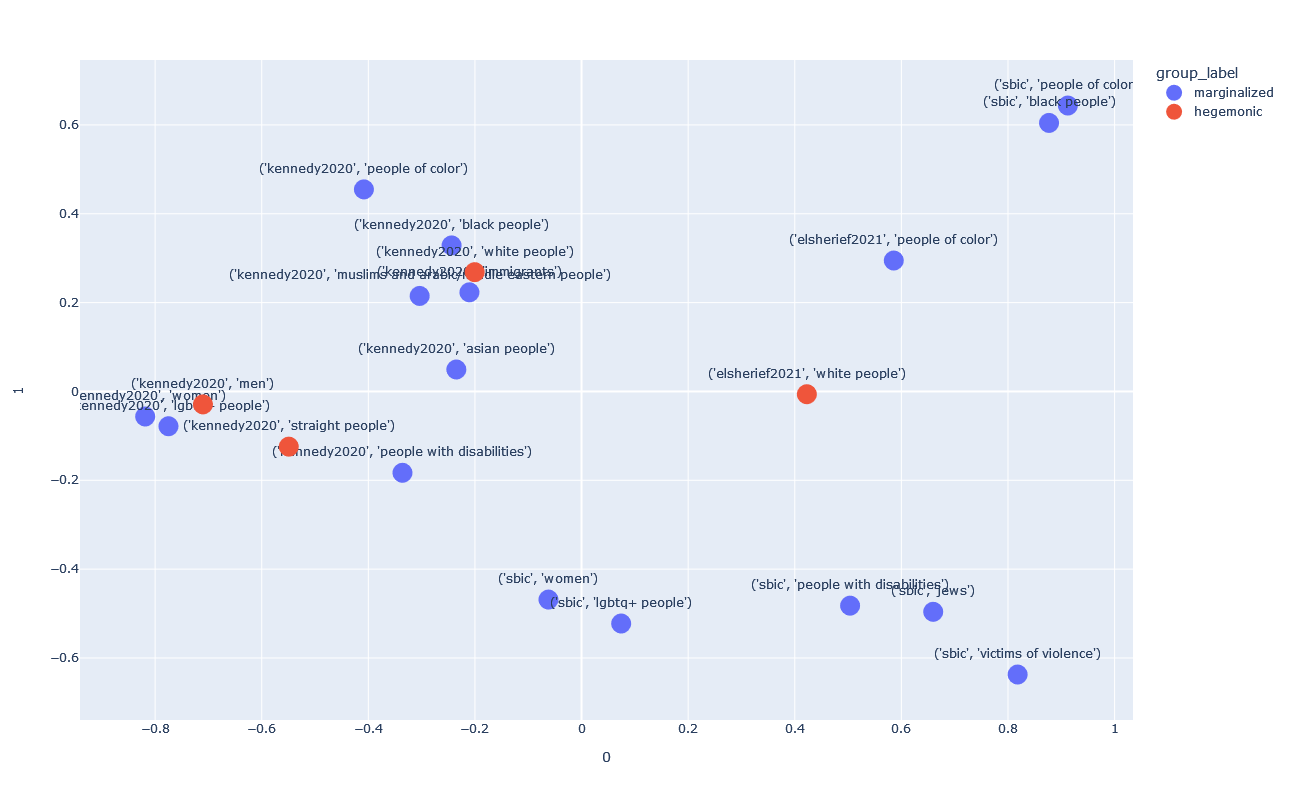

In [11]:
# Run PCA
from sklearn.decomposition import PCA
from IPython.display import display

# Load group labels
import json

path = '/storage2/mamille3/hegemonic_hate/group_labels.json'
with open(path, 'r') as f:
    group_labels = json.load(f) 
len(group_labels)

pca = PCA(n_components=2)
reduced = pca.fit_transform(scores.values)
reduced = pd.DataFrame(reduced, index=scores.index)
reduced

# Assign group labels to groups so can visualize colors
reduced['group_label'] = reduced.index.map(lambda x: group_labels.get(x[1]))
display(reduced)

# Plot
import plotly.express as px
fig = px.scatter(reduced, x=0, y=1, color='group_label', text=reduced.index, width=1000, height=800)
fig.update_traces(marker={'size': 20})
fig.update_traces(textposition='top center')
fig.show()

In [26]:
identities = set(identity for dataset, identity in identity_folds)
print(len(identities))
identities

13


{'asian people',
 'black people',
 'immigrants',
 'jews',
 'lgbtq+ people',
 'men',
 'muslims and arabic/middle eastern people',
 'people of color',
 'people with disabilities',
 'straight people',
 'victims of violence',
 'white people',
 'women'}

In [21]:
from pprint import pprint
pprint(list(identity_folds.keys()))

[('elsherief2021', 'people of color'),
 ('elsherief2021', 'white people'),
 ('kennedy2020', 'black people'),
 ('kennedy2020', 'immigrants'),
 ('kennedy2020', 'lgbtq+ people'),
 ('kennedy2020', 'men'),
 ('kennedy2020', 'muslims and arabic/middle eastern people'),
 ('kennedy2020', 'people of color'),
 ('kennedy2020', 'people with disabilities'),
 ('kennedy2020', 'women'),
 ('sbic', 'black people'),
 ('sbic', 'jews'),
 ('sbic', 'lgbtq+ people'),
 ('sbic', 'people of color'),
 ('sbic', 'people with disabilities'),
 ('sbic', 'victims of violence'),
 ('sbic', 'women')]
